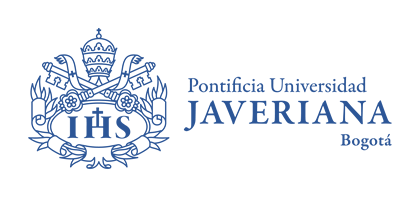

### **Profesor**
* Sergio Mora
### **Integrantes**
* Javier Acero 
* Gerson Gaitan 
* Juan Sebastian Amaya Velasco
* Diana Marcela González Figueroa


# E1 - Model Deployment in Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [11]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score
import json 
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import joblib


In [12]:
data = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTrain_carListings.zip')

In [13]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [14]:
data.shape

(500000, 6)

In [15]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P0.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process.


Se realiza la dumificación de las variables que son categóricas, esto nos ayudará a mejorar el rendimiento del modelo

In [16]:
ordinal_encoder = OrdinalEncoder()
data[['State', 'Make', 'Model']] = ordinal_encoder.fit_transform(data[['State', 'Make', 'Model']])

X = data[['Year', 'Mileage', 'State', 'Make', 'Model']]
y = data['Price']

- Se graban las variables categoricas para la parte visual del API 

In [17]:
categorias = {
    feature: {i: category for i, category in enumerate(categories)}
    for feature, categories in zip(['State', 'Make', 'Model'], ordinal_encoder.categories_)
}

# Guardar en un archivo JSON
with open('categorias.json', 'w') as f:
    json.dump(categorias, f, indent=4)

Se revisa valores duplicados en la base y se eliminan

In [18]:
data.duplicated().sum()
duplicados = data.duplicated()
duplicados_valores = data[duplicados]
data.drop_duplicates(inplace=True)

## La ejecución de los Kfolds manuales de cada modelo se realizó en el taller anterior, para este ejercicio utilizamos las funciones de cross validation

### Entrenamiento modelo

In [19]:
#Se generan las bases de train y test para entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Se entrena el modelo con un modelo básico de regresión lineal

In [20]:
# Definir el número de folds
k = 10

# Crear el objeto KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Crear el modelo
model = LinearRegression()

# Definir las métricas
scoring = {
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'MAE': make_scorer(mean_absolute_error)
}

# Realizar el K-Fold Cross Validation
rmse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring['RMSE'])
mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring['MAE'])

# Calcular métricas promedio
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)

# Imprimir resultados
print(f'Average Root Mean Squared Error (RMSE): {mean_rmse}')
print(f'Average Mean Absolute Error (MAE): {mean_mae}')

Average Root Mean Squared Error (RMSE): 8926.211337526365
Average Mean Absolute Error (MAE): 6844.876422640118


#### Se realiza validación con un modelo de Random Forest

In [23]:
# Inicializar el modelo

model_rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

# Definir el número de folds
k = 10

# Definir las métricas
scoring = {
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'MAE': make_scorer(mean_absolute_error) ##Mean absolute error
}

# Realizar K-Fold Cross-Validation
# results = cross_validate(model_rf, X_train, y_train, cv=k, scoring=scoring, return_train_score=False)

# Calcular métricas promedio
mean_rmse = np.mean(results['test_RMSE'])
mean_mae = np.mean(results['test_MAE'])

# Imprimir resultados
print(f'Average Root Mean Squared Error (RMSE): {mean_rmse}')
print(f'Average Mean Absolute Error (MAE): {mean_mae}')

Average Root Mean Squared Error (RMSE): 3703.6370950585633
Average Mean Absolute Error (MAE): 2367.822077306214


#### Se realiza modelo XgBoost

In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_validate
import numpy as np

# Inicializar el modelo XGBoost
model_xgb = XGBRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

# Definir el número de folds
k = 10

# Definir las métricas
scoring = {
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'MAE': make_scorer(mean_absolute_error)
}

# Realizar K-Fold Cross-Validation
results = cross_validate(model_xgb, X_train, y_train, cv=k, scoring=scoring, return_train_score=False)

model_xgb.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(model_xgb, 'model_xgb_api.pkl')

# Calcular métricas promedio
mean_rmse = np.mean(results['test_RMSE'])
mean_mae = np.mean(results['test_MAE'])

# Imprimir resultados
print(f'Average Root Mean Squared Error (RMSE): {mean_rmse}')
print(f'Average Mean Absolute Error (MAE): {mean_mae}')

Average Root Mean Squared Error (RMSE): 3703.6370950585633
Average Mean Absolute Error (MAE): 2367.822077306214


Se deicide utilizar XgBoost para el API ya que el MAE de 2367.822 indica que, en promedio, las predicciones del modelo se desvían aproximadamente $2,367 del valor real. Esto teniendo en cuenta los demás modelos es el más bajo de todos

# Exercise P0.2 (50%)

Create an API of the model.

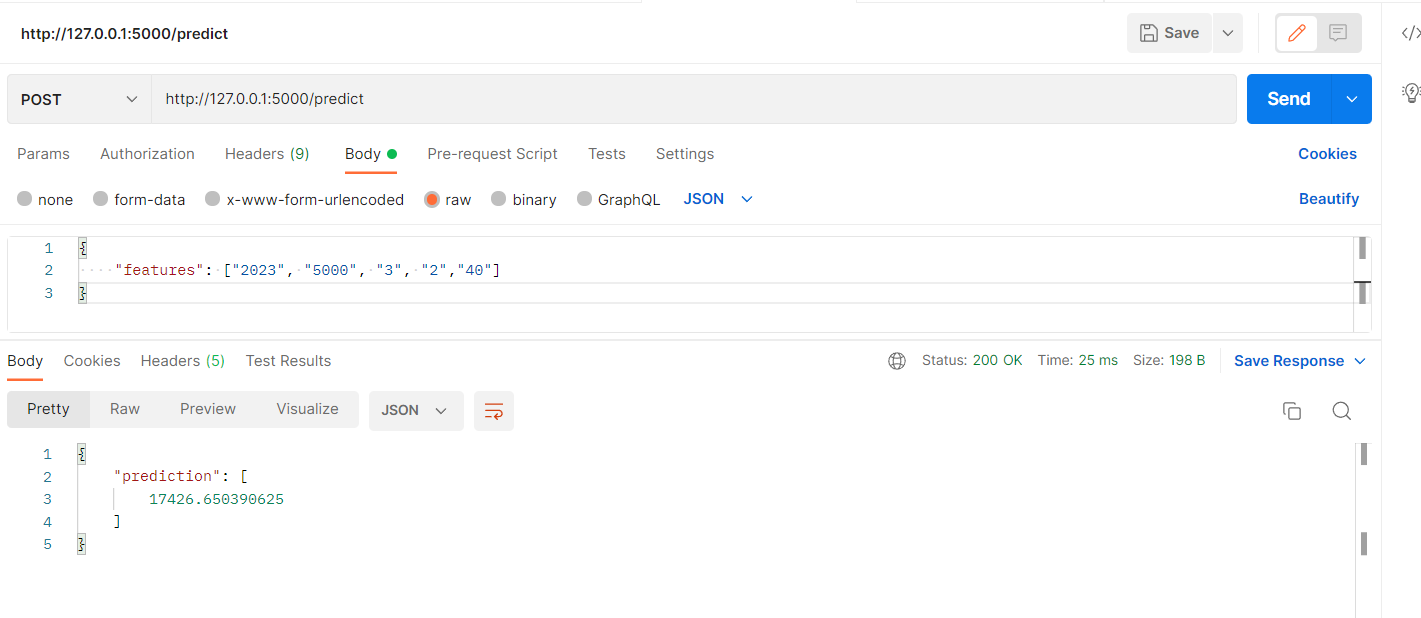

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


El modelo desarrollado, basado en XGBoost, se desplegará en el entorno de hosting proporcionado a través de la siguiente URL:
https://javiacero.com/pruebaUniversidad_grafico.php.

Este despliegue permitirá integrar el modelo en una aplicación web accesible para los usuarios finales, donde podrán interactuar con las predicciones en tiempo real. 

### API

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib  # También puedes usar pickle si el modelo fue guardado con pickle

modelo = joblib.load("/home/ubuntu/flask_api/modelos/model_xgb_api.pkl")  # Reemplaza con la ruta real del archivo>

app = Flask(__name__)

# Ruta de prueba
@app.route('/ping', methods=['GET'])
def ping():
    return jsonify({"message": "Pong!"})

@app.route("/predict", methods=["POST"])


def predict():
    try:
        # Obtener datos en formato JSON
        data = request.get_json()

        # Convertir a DataFrame
        input_data = pd.DataFrame([data], columns=['Year', 'Mileage', 'State', 'Make', 'Model'])

        # Hacer predicción
        prediction = modelo.predict(input_data)

        # Enviar respuesta en JSON
        return jsonify({"prediction": prediction.tolist()})

    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8080, debug=True)



Como parte de la arquitectura del sistema, se ha implementado un microservicio dedicado exclusivamente a la ejecución del modelo de predicción basado en XGBoost. 

El microservicio recibe solicitudes HTTP con los datos de entrada necesarios, aplica el modelo de predicción y devuelve los resultados en formato JSON.

Tecnologías Utilizadas:

Lenguaje de Programación: PHP y Python
Modelo: XGBoost serializado usando Joblib.

Endpoints:

POST /predict: Recibe los datos de entrada y devuelve las predicciones del modelo.

La aplicación web, alojada en https://javiacero.com/pruebaUniversidad_grafico.php, consume el microservicio de la siguiente manera:

Envío de Datos:

Cuando un usuario ingresa los datos en la interfaz web, la aplicación envía una solicitud HTTP POST al microservicio con los datos de entrada en formato JSON.

Procesamiento en el Microservicio:
El microservicio recibe los datos, los preprocesa si es necesario y aplica el modelo de XGBoost para generar las predicciones.

Respuesta:
El microservicio devuelve las predicciones en formato JSON, incluyendo los resultados y cualquier métrica adicional relevante.

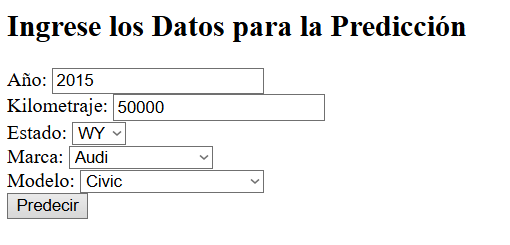

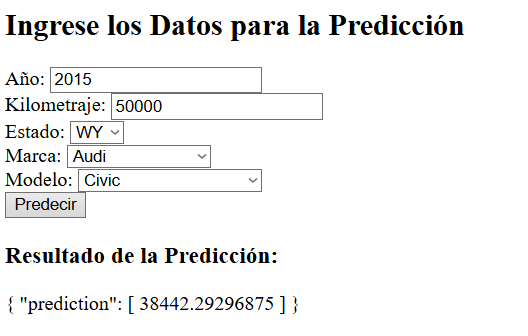

### Aplicación PHP